In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables

# These are for Piton de la Fournaise
#eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_reunion.csv"))
#average_rain = pd.read_csv(os.path.join(folder_path, "average_reunion.csv"))

# These are all for the Galapagos
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos2.csv"))
#climate_bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
#average_rain = climate_bellavista[['observation_date', 'precipitation']]
climate_ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))
average_ayora = climate_ayora[['observation_date', 'precipitation']]

# This is the ONI water surface temperature for El Nino
oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

In [4]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [5]:
# Converts date information from ONI into numerical format

date_converter = {'DJF': ('12', '03', '01'), 'JFM': ('01', '04', '02'), 'FMA': ('02', '05', '03'), 'MAM': ('03', '06', '04'), 'AMJ': ('04', '07', '05'), 'MJJ': ('05', '08', '06'), 'JJA': ('06', '09', '07'), 'JAS': ('07', '10', '08'), 'ASO': ('08', '11', '09'), 'SON': ('09', '12', '10'), 'OND': ('10', '01', '11'), 'NDJ': ('11', '02', '12')}

def convert_start(row):
    if row['SEAS'] == 'DJF':
        return str(row['YR']-1) + '-' + date_converter[row['SEAS']][0] + '-01'
    else:
        return str(row['YR']) + '-' + date_converter[row['SEAS']][0] + '-01' 

def convert_end(row):
    if row['SEAS'] == 'NDJ':
        return str(row['YR']+1) + '-' + date_converter[row['SEAS']][1] + '-01'
    else: 
        return str(row['YR']) + '-' + date_converter[row['SEAS']][1] + '-01' 

def convert_mid(row):
    return str(row['YR']) + '-' + date_converter[row['SEAS']][2] + '-15' 

oni['Start'] = oni.apply(convert_start, axis=1)
oni['End'] = oni.apply(convert_end, axis=1)
oni['Center'] = oni.apply(convert_mid, axis=1)

In [6]:
el_nino = oni[oni['ANOM'] >= .5]

In [7]:
non_nino_eruptions = pd.DataFrame()
for i in eruptions.iterrows():
    add = True
    for j in el_nino.iterrows():
        if i[1][1] >= j[1][4] and i[1][1] < j[1][5]:
            add = False
            break
    if add == True:
        non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)



/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_nino_eruptions = non_nino_eruptions.append(i[1], ignore_index= True)
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_52391/2819683953.py:9: FutureWarning: The frame.append method is deprec

In [8]:
print(non_nino_eruptions)

          Volcano       Start         End  Max Explosivity
0      Fernandina  1961-03-21  1961-09-16                2
1            Wolf  1963-03-04  1963-03-16                0
2   Negra, Sierra  1963-04-13  1963-05-16                2
3     Azul, Cerro  1967-08-09        None                2
4      Fernandina  1968-05-21  1968-05-23                2
5      Fernandina  1973-12-09  1973-12-16                2
6      Fernandina  1978-08-08  1978-08-26                2
7     Azul, Cerro  1979-01-29  1979-03-04                2
8      Fernandina  1981-08-01        None                0
9      Fernandina  1984-03-30        None                1
10     Fernandina  1988-09-14  1988-09-16                2
11     Fernandina  1991-04-19  1991-04-24                2
12         Alcedo  1993-12-05        None                1
13    Azul, Cerro  1998-09-15  1998-10-21                1
14     Fernandina  2005-05-13  2005-05-29                2
15  Negra, Sierra  2005-10-22  2005-10-30               

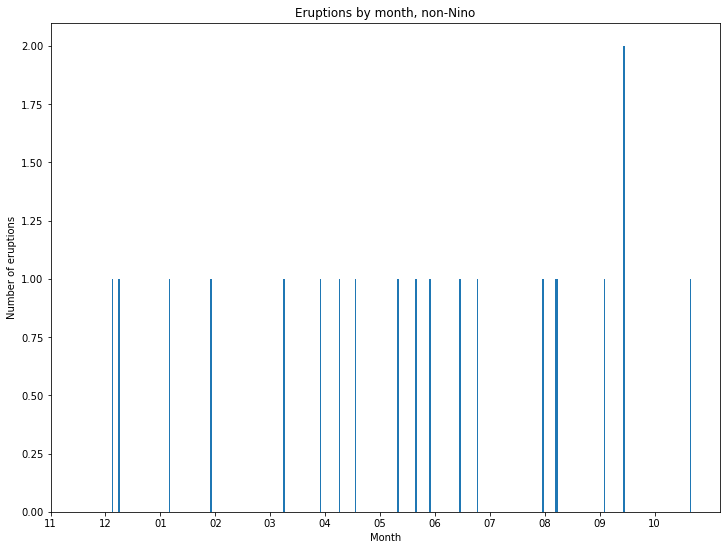

In [9]:
# Breaks up rain by month
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
plt.figure(figsize=(12,9))

plt.hist(x, bins=365)
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Number of eruptions") 
plt.title('Eruptions by month, non-Nino') 
plt.show() 

In [51]:
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
print(bin_indices)


[281 202  38 280  89 273 150 318 169  34 318 193 355 210 160 307 129 227
 237  66]


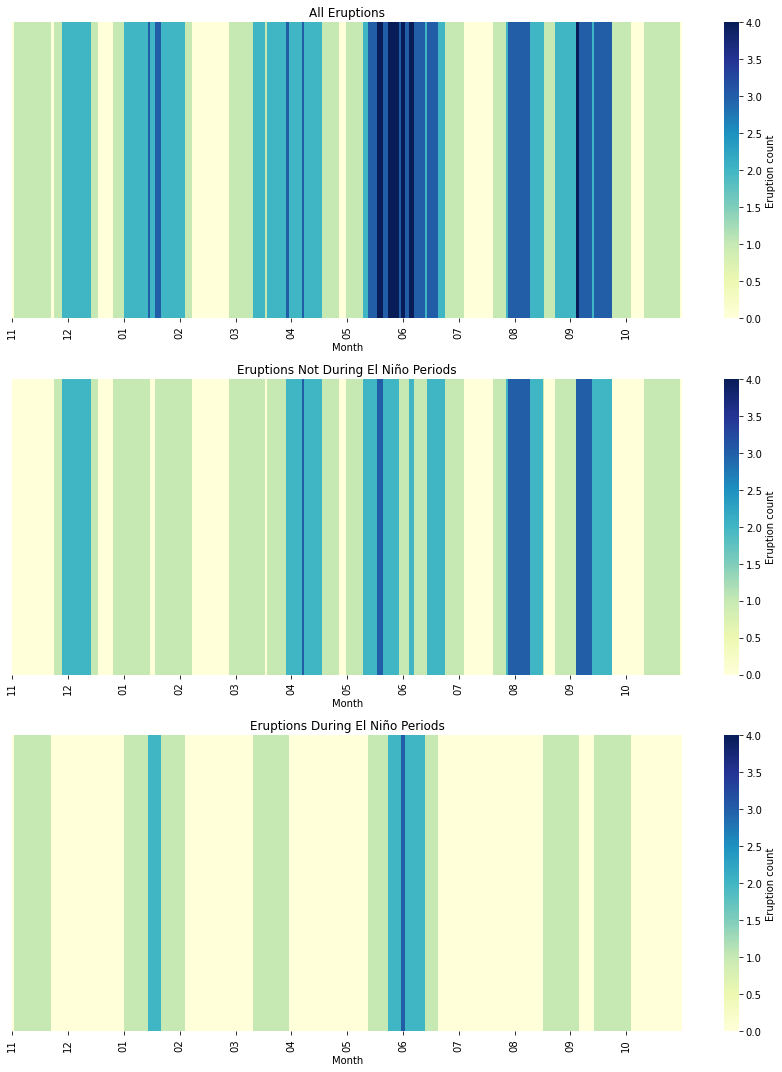

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12,15))

erupt_dates = eruptions['Start'][eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data1 = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data1[0][i-11+j] += 1

# plt.xlabel("Month")
# plt.yticks([])
# plt.xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])

erupt_dates_non_nino = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts_non_nino = np.array(erupt_dates_non_nino.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts_non_nino]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data2 = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data2[0][i-11+j] += 1

decimal_erupts_nino = np.array(list(set(decimal_erupts)- set(decimal_erupts_non_nino)))
x = [((i + (2/12)) % 1) for i in decimal_erupts_nino]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data3 = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data3[0][i-11+j] += 1

sns.heatmap(data1, ax=axes[0], cbar=True, cbar_kws={"label": "Eruption count"}, annot=False, fmt=".2f", cmap="YlGnBu")
sns.heatmap(data2, ax=axes[1], cbar=True, cbar_kws={"label": "Eruption count"}, annot=False, fmt=".2f", cmap="YlGnBu", vmax=4)
sns.heatmap(data3, ax=axes[2], cbar=True, cbar_kws={"label": "Eruption count"}, annot=False, fmt=".2f", cmap="YlGnBu", vmax=4)

axes[0].set_title("All Eruptions")
axes[1].set_title("Eruptions Not During El Niño Periods")
axes[2].set_title("Eruptions During El Niño Periods")

axes[0].set_xlabel("Month")
axes[1].set_xlabel("Month")
axes[2].set_xlabel("Month")

axes[0].set_yticks([])
axes[1].set_yticks([])
axes[2].set_yticks([])

axes[0].set_xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
axes[1].set_xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
axes[2].set_xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.tight_layout()
plt.savefig("combined_erupts.jpg")
plt.show()

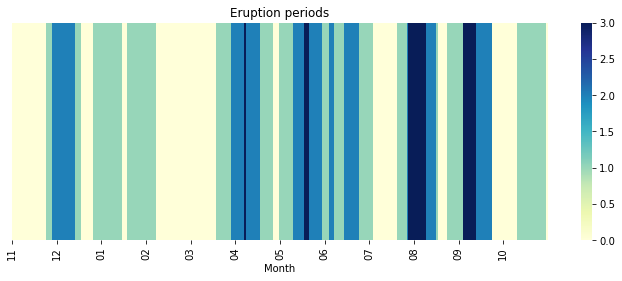

In [11]:
erupt_dates = non_nino_eruptions['Start'][non_nino_eruptions['Start'] >= '1965']
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
x = [((i + (2/12)) % 1) for i in decimal_erupts]
bin_edges = [i * 1/365 for i in range(365)]
bin_indices = np.digitize(x, bin_edges)
data = np.zeros((1, 365))
for i in bin_indices:
    for j in range(20):
        data[0][i-11+j] += 1
plt.figure(figsize=(12,4))
sns.heatmap(data, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title("Eruption periods")
plt.xlabel("Month")
plt.yticks([])
plt.xticks([(1/12)*k*365 for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.savefig("non_nino_erupts.jpg")
plt.show()

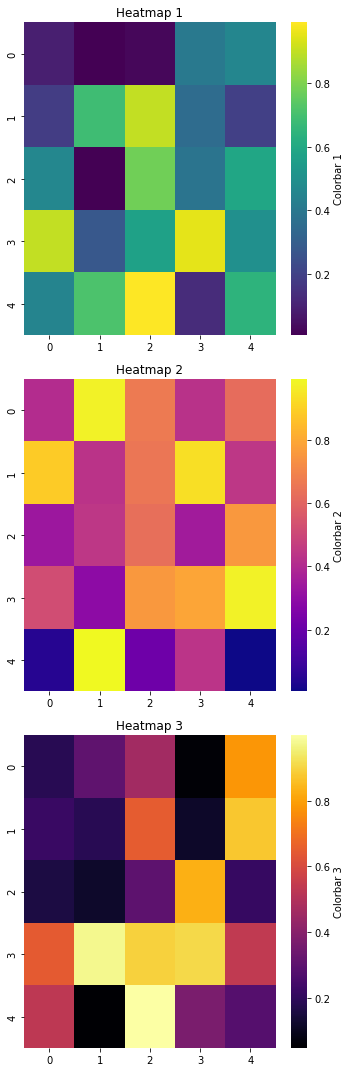

In [16]:
data1 = np.random.rand(5, 5)
data2 = np.random.rand(5, 5)
data3 = np.random.rand(5, 5)

# Create a single figure and add subplots arranged in rows
fig, axes = plt.subplots(3, 1, figsize=(5, 15))  # 3 rows, 1 column

# Plot the heatmaps using Seaborn
sns.heatmap(data1, cmap='viridis', ax=axes[0], cbar=True, cbar_kws={"label": "Colorbar 1"})
sns.heatmap(data2, cmap='plasma', ax=axes[1], cbar=True, cbar_kws={"label": "Colorbar 2"})
sns.heatmap(data3, cmap='inferno', ax=axes[2], cbar=True, cbar_kws={"label": "Colorbar 3"})

# Add titles to the subplots
axes[0].set_title('Heatmap 1')
axes[1].set_title('Heatmap 2')
axes[2].set_title('Heatmap 3')

# Adjust the layout to prevent overlapping titles or labels
plt.tight_layout()

# Show the plot
plt.show()